   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1       1  
1          1                          0       0  
2          1                          1       1  
3          1                          1       1  
4          0                          0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair     

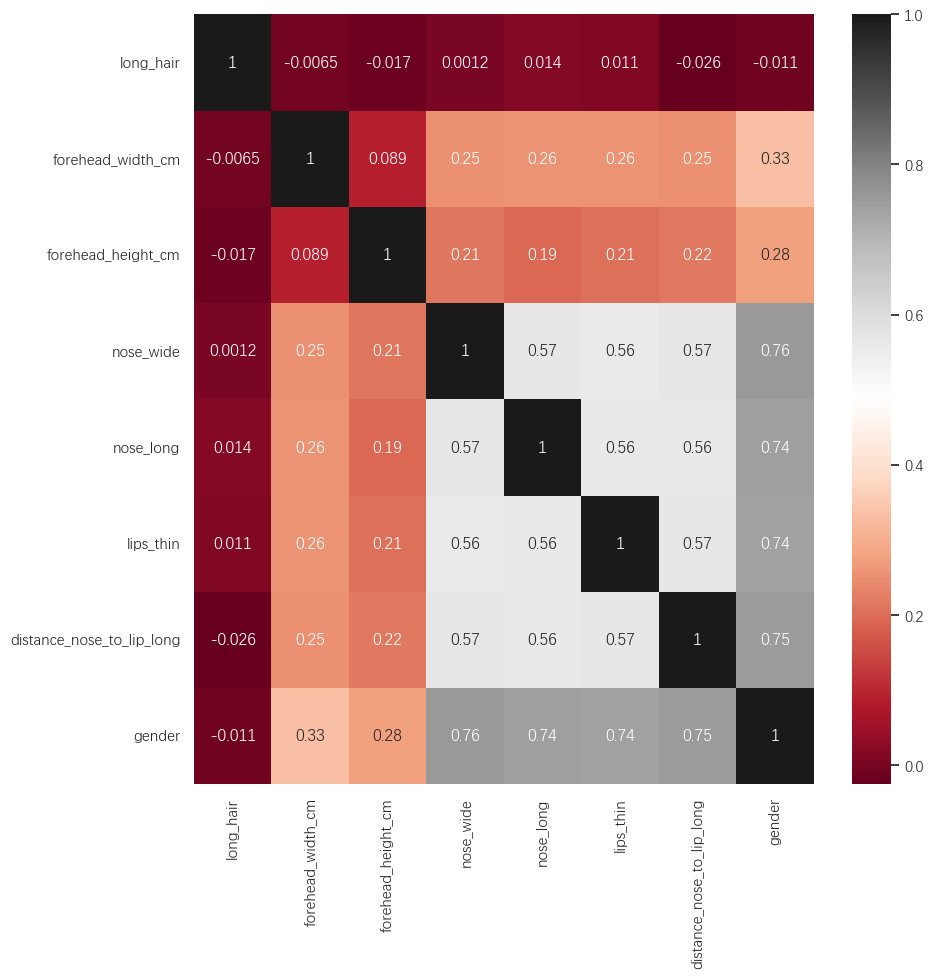

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,1
1,0,0.634146,0.15,0,0,1,0,0
2,0,0.097561,0.60,1,1,1,1,1
3,0,0.731707,0.50,0,1,1,1,1
4,1,0.512195,0.40,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.536585,0.00,0,0,0,0,0
4997,1,0.121951,0.15,0,0,0,0,0
4998,1,0.365854,0.30,0,0,0,0,0
4999,1,0.439024,0.55,0,0,0,0,0


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()    #设置画图空间为 Seaborn 默认风格
# 汉化字体
matplotlib.rc("font", family='DengXian')

def load_csv():
    data = pd.read_csv("gender_classification.csv")
    data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
    print(data.head(5))
    return data

# 归一化数据
def z_score_normalize_data(data, target_cols):
    for col in target_cols:
        col_min = data[col].min()
        col_max = data[col].max()
        data[col] = (data[col] - col_min) / (col_max - col_min)
    return data

# 对特定列使用标准差法处理离群值

def remove_outliers_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

import numpy as np

class LogisticRegression(object):
    def __init__(self, num_of_features, lambda_reg=1):
        np.random.seed(0)
        self.w= np.random.randn(num_of_features, 1)
        self.b = 0.
        self.lambda_reg = lambda_reg  # 正则化参数

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return self.sigmoid(z)

    def loss(self, y_pred, y_true):
        epsilon = 1e-5  # 避免log(0)的情况
        m = len(y_true)
        cost = -1/m * np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        return cost

    def loss_with_reg(self, y_pred, y_true):
        cost = self.loss(y_pred, y_true)
        reg = self.lambda_reg / (2 * len(y_true)) * np.sum(np.square(self.w))
        return cost + reg

    def gradient(self, x, y_true):
        m = len(y_true)
        y_pred = self.forward(x)
        error = y_pred - y_true
        gradient_w = (1/m) * np.dot(x.T, error) + (self.lambda_reg / m) * self.w
        gradient_b = np.mean(error)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w -= eta * gradient_w
        self.b -= eta * gradient_b

    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred >= 0.5).astype(int)

    def accuracy(self, x, y_true):
        y_pred = self.predict(x)
        return np.mean(y_pred == y_true)

    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            y_pred = self.forward(x)
            L = self.loss_with_reg(y_pred, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i + 1) % 1000 == 0:
                print('iter {}, loss {}'.format(i, L))
                accuracy_train = self.accuracy(x, y)
                print('准确率为: {:.2f}%'.format(accuracy_train * 100))
        return losses, self.w, self.b

    
data = load_csv()
data.info()
corrboston = data.corr()
plt.figure(figsize=(10,10))    #设置画布
sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()
target_cols = ['forehead_width_cm', 'forehead_height_cm']
for col in target_cols:
    data = remove_outliers_std(data, col)
data = z_score_normalize_data(data, target_cols)
data

In [36]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
offset = int(x.shape[0] * 0.7)
x_train, x_test = x[:offset], x[offset:]
y_train, y_test = y[:offset], y[offset:]
log01 = LogisticRegression(x_train.shape[1], lambda_reg=0.1)

num_iterations = 10000
losses, fw, fb= log01.train(x_train, y_train, iterations=num_iterations, eta=0.01)

iter 999, loss 0.28282695467429136
准确率为: 88.77%
iter 1999, loss 0.21099598467155226
准确率为: 95.69%
iter 2999, loss 0.17551355063500335
准确率为: 95.89%
iter 3999, loss 0.1545870200448914
准确率为: 95.83%
iter 4999, loss 0.140937187099099
准确率为: 96.00%
iter 5999, loss 0.13141278592374783
准确率为: 96.06%
iter 6999, loss 0.12443262061707219
准确率为: 96.11%
iter 7999, loss 0.11911981988364938
准确率为: 96.11%
iter 8999, loss 0.11495144737429262
准确率为: 96.11%
iter 9999, loss 0.11159790402234938
准确率为: 96.14%


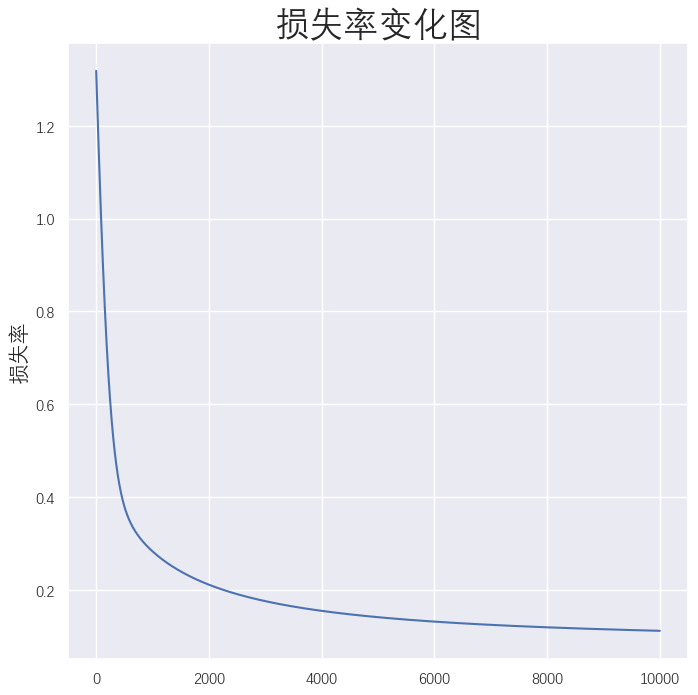

In [37]:
plt.figure(figsize=(8, 8), num="损失函数")
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.ylabel("损失率", fontsize=15)
plt.title("损失率变化图", fontsize=25)
plt.show()

In [41]:
# 测试集验证
print('测试集准确率为', log01.accuracy(x_test, y_test))

测试集准确率为 0.9600266489007329
